In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import cv2
import os
import random

from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from skimage.transform import resize
from skimage.color import rgb2gray
#from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

class SkinCancer :
    def __init__ (self):
        self.model = self.load_model()
        
    def build_model (self) :
        model = Sequential()
        model.add(Conv2D(filters = 128, kernel_size = (4,4), input_shape = (64, 64, 3), activation = 'relu'))
        model.add(MaxPool2D(pool_size = (4,4)))
        model.add(Conv2D(filters = 64, kernel_size = (2,2), activation = 'relu'))
        model.add(MaxPool2D(pool_size = (2,2)))
        model.add(BatchNormalization())
        #model.add(GlobalAveragePooling2D())

        model.add(Flatten())
        model.add(Dense(128, activation = 'relu'))
        model.add(Dropout(0.1))
        model.add(Dense(2, activation = 'sigmoid')) # sigmoid is better for binary classification

        #model.summary()
        return model
    
    def load_model(self):
        model = self.build_model()
        model = load_model("Normal_skin_cancer_model.h5")
        return model
        
    def preprocess_image(self,img):
        img = cv2.resize(img, (64,64))
        img = img.reshape(1,64,64,3)
        return img
    
    def predict(self,img):
        real_labels = ["benign", "malignant"]
        img = self.preprocess_image(img)
        res = np.argmax(self.model.predict(img))
        return real_labels[res]

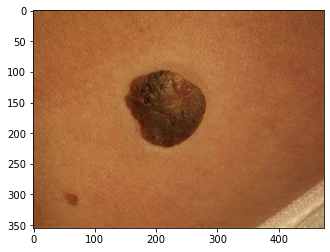

In [4]:
img = plt.imread("OIP (3).jpg")
plt.imshow(img)
# True label :- benign

In [5]:
sk = SkinCancer()
res = sk.predict(img)
print(res)

benign
